In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
import sklearn

import matplotlib.pyplot as plt

In [2]:
# Load data

from sklearn.datasets import fetch_california_housing

housing_prices = fetch_california_housing(as_frame=True)

(X, y) = (housing_prices.data, housing_prices.target)

print(housing_prices.feature_names)
print(housing_prices.DESCR)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for Califo

In [3]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [4]:
X.head(8)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25


In [5]:
X.tail(8)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20632,3.1250,15.0,6.023377,1.080519,1047.0,2.719481,39.26,-121.45
20633,2.5495,27.0,5.445026,1.078534,1082.0,2.832461,39.19,-121.53
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [6]:
X.to_numpy().shape

(20640, 8)

In [7]:
y.to_numpy().shape

(20640,)

In [8]:
len(y)

20640

In [9]:
from sklearn.model_selection import train_test_split

train_ratio = 0.8
(X_train, X_ideal, y_train, y_ideal) = train_test_split(X, y.to_numpy(), test_size=(1 - train_ratio))

val_len = len(y_ideal) // 2
(X_val, y_val) = (X_ideal[0:val_len], y_ideal[0:val_len])
(X_test, y_test) = (X_ideal[val_len:], y_ideal[val_len:])

In [10]:
# X_train, X_val, X_test are pandas DataFrame, y_train, y_val, y_test are numpy ndarray
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.870045,28.614523,5.421804,1.096029,1426.999455,3.008197,35.616165,-119.552610
std,1.898237,12.586835,2.494013,0.482172,1111.873562,6.183637,2.133806,2.002192
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.562500,18.000000,4.438435,1.005525,787.000000,2.427168,33.930000,-121.770000
50%,3.538800,29.000000,5.224816,1.048114,1169.000000,2.816556,34.240000,-118.480000
75%,4.746650,37.000000,6.046826,1.099192,1726.000000,3.278557,37.710000,-118.000000
max,15.000100,52.000000,141.909091,34.066667,28566.000000,599.714286,41.950000,-114.310000


In [11]:
X_train.shape

(16512, 8)

In [12]:
y_train.shape

(16512,)

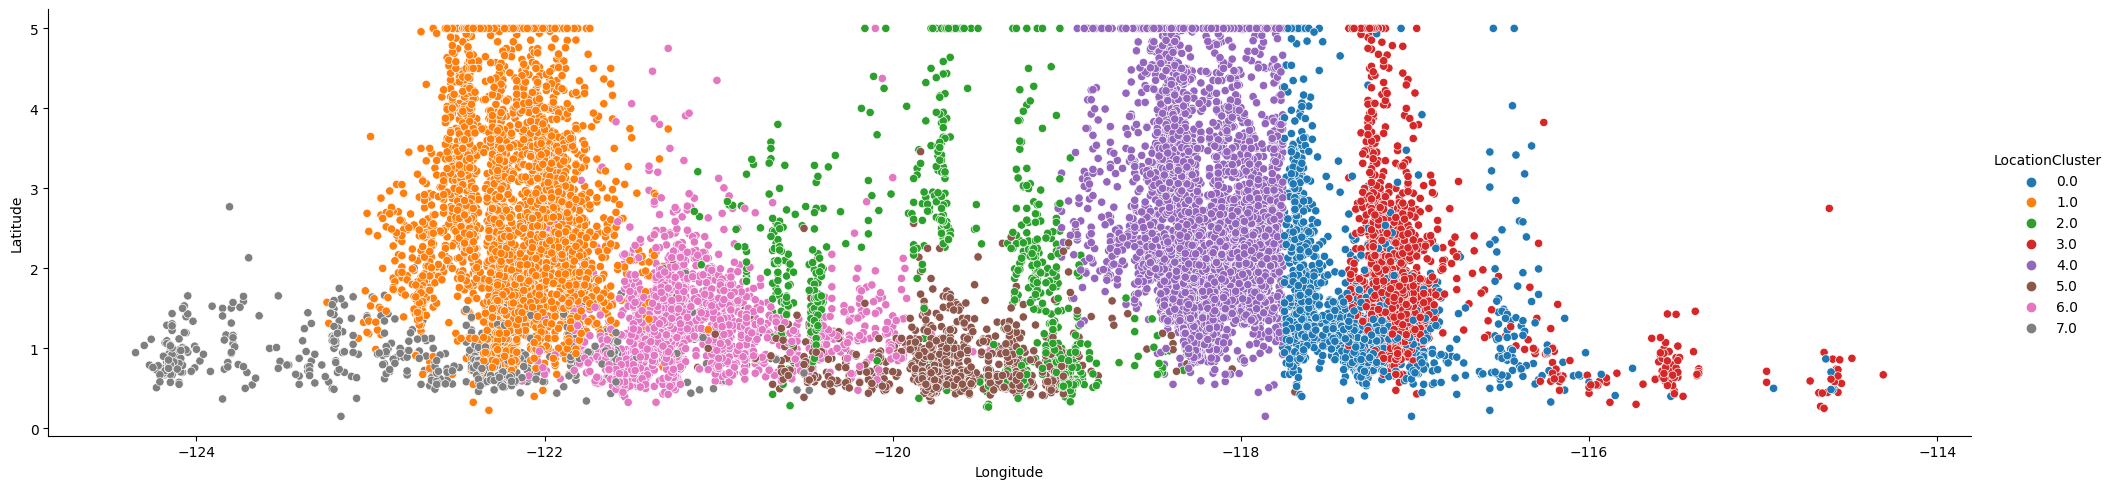

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from preprocessing_utils import AddCluster, AsNumPy, WrapAsDataFrame
import seaborn as sns

def melt_test_cluster(X, y, cluster_features, kmeans, cluster_name="Cluster", x_axis="value", target_name="Target"):
    add_cluster = AddCluster(cluster_features, kmeans, cluster_name)
    X_with_cluster = add_cluster.fit_transform(X)
    X_with_cluster[cluster_name] = X_with_cluster[cluster_name].astype("category")

    X_with_cluster[target_name] = y

    actual_clusterfeatures_names = add_cluster.actual_cluster_column_names
    
    sns.relplot(
        x=x_axis, y=target_name, hue=cluster_name, col="variable",
        height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
        data=X_with_cluster.melt(
            value_vars=actual_clusterfeatures_names, id_vars=[target_name, cluster_name]
        )
    )
    
def test_cluster(X, y, cluster_features, kmeans, cluster_name="Cluster", x_axis="value", target_name="Target", scale_features=False):
    X_ = X.copy()
    if scale_features:
        X_ = WrapAsDataFrame(feature_names=X.columns).fit_transform(StandardScaler().fit_transform(X_))
    
    add_cluster = AddCluster(cluster_features, kmeans, cluster_name)
    X_with_cluster = add_cluster.fit_transform(X_)
    X_with_cluster[cluster_name] = X_with_cluster[cluster_name].astype("category")

    X_with_cluster[target_name] = y

    actual_clusterfeatures_names = add_cluster.actual_cluster_column_names
    
    sns.relplot(
        x=x_axis, y=target_name, hue=cluster_name,
        data=X_with_cluster, aspect=4
    )

test_cluster(X_train, y_train, 
             cluster_features=["Latitude", "Longitude"], kmeans=KMeans(8, n_init=10), cluster_name="LocationCluster",
             x_axis="Longitude", target_name="Latitude", scale_features=False)

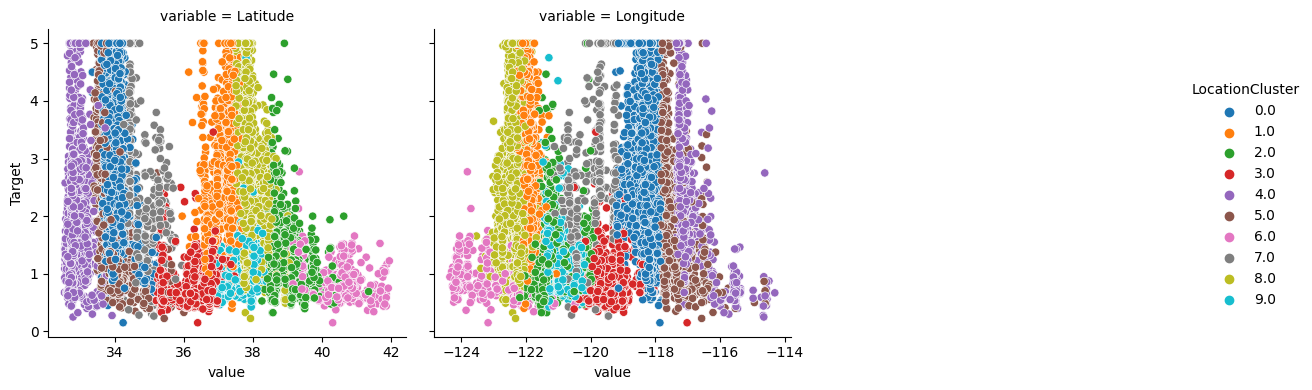

In [14]:
melt_test_cluster(X_train, y_train, 
             cluster_features=["Latitude", "Longitude"], kmeans=KMeans(10, n_init=10), cluster_name="LocationCluster")

In [15]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

Longitude     0.396112
MedInc        0.385706
Location      0.384277
Latitude      0.366319
AveRooms      0.095054
AveOccup      0.065707
AveBedrms     0.032390
HouseAge      0.029254
Population    0.023039
Name: Mutual Info Scores, dtype: float64


(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 13463  3.8750      17.0  5.840959   1.023965      1621.0  3.531590     34.13   
 15818  1.6500      52.0  2.532203   1.033898      1630.0  2.762712     37.76   
 9481   2.3333      18.0  4.586992   1.021138      1636.0  2.660163     39.39   
 7208   2.3462      42.0  3.750000   1.010163      2191.0  4.453252     34.01   
 7662   3.9091      44.0  5.005587   1.128492      1115.0  3.114525     33.83   
 ...       ...       ...       ...        ...         ...       ...       ...   
 14880  2.2400      30.0  3.930233   1.058824      1593.0  2.179207     32.64   
 10939  4.0769      32.0  5.392593   0.992593       837.0  6.200000     33.73   
 11961  7.7197       4.0  6.153846   0.769231        55.0  4.230769     33.89   
 7206   3.0972      33.0  3.781818   1.027273       987.0  4.486364     34.02   
 5738   9.5823      52.0  7.981752   1.036496       733.0  2.675182     34.16   
 
        Longitude   Locati

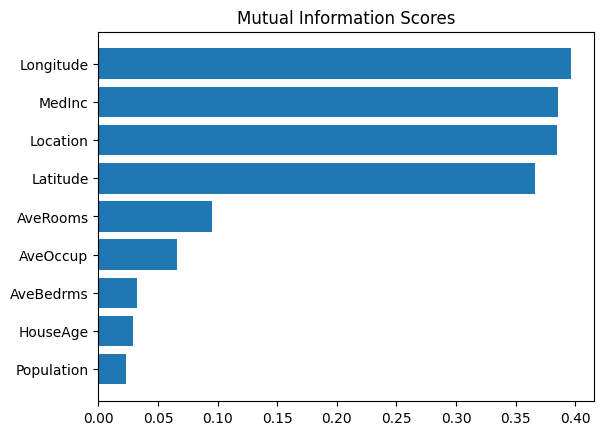

<Figure size 800x500 with 0 Axes>

In [16]:
# PREPROCESSING
from preprocessing_utils import add_onehot_cluster
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_selection import mutual_info_regression
from mutual_info import organize_mi_scores, plot_mi_scores

# feature cross
def add_location_cross(df_X):
    df_X["Location"] = df_X["Latitude"] * df_X["Longitude"]
    return df_X

# pipelines
pipe1 = Pipeline([
    ("add Location feature", FunctionTransformer(add_location_cross))
])

feature_names_out_pipe1 = housing_prices.feature_names + ["Location"]

pipe2 = Pipeline([
    ("standardizer", StandardScaler()),
    ("go back to being a DataFrame", WrapAsDataFrame(feature_names=feature_names_out_pipe1)),
    ("add onehot LocationCluster", add_onehot_cluster(["Latitude", "Longitude"], KMeans(8, n_init=10), 
                                                      column_name="LocationCluster", drop_clustered_features=True))
])

# mutual info
def mutual_info_scores(X, y, preprocessor, feature_names_out):
    X_preprocessed = preprocessor.fit_transform(X)
    mi_scores = mutual_info_regression(X_preprocessed, y)

    print(organize_mi_scores(mi_scores, feature_names_out))
    plot_mi_scores(mi_scores, feature_names_out)

    X_preprocessed = pd.DataFrame(X_preprocessed, columns=feature_names_out)

    return (X_preprocessed, mi_scores)

mutual_info_scores(X_train, y_train, pipe1, feature_names_out_pipe1)

In [17]:
preprocessor = Pipeline([
    ("pipe1", pipe1),
    ("pipe2", pipe2)
])

In [18]:
# play with data
X_train[X_train["AveBedrms"] < 1]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Location
11622,5.8440,26.0,6.334877,0.983025,2072.0,3.197531,33.82,-118.04,-3992.1128
11080,4.3661,35.0,5.797665,0.976654,629.0,2.447471,33.80,-117.84,-3982.9920
10523,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,-3948.8350
16460,7.6889,11.0,6.813688,0.958175,767.0,2.916350,38.12,-121.30,-4623.9560
6569,4.5000,46.0,5.594796,0.970260,857.0,3.185874,34.20,-118.15,-4040.7300
...,...,...,...,...,...,...,...,...,...
6566,5.0953,39.0,5.946759,0.986111,1282.0,2.967593,34.20,-118.14,-4040.3880
16155,3.0877,47.0,4.184783,0.998447,1505.0,2.336957,37.78,-122.49,-4627.6722
20286,3.5867,32.0,5.087662,0.987013,1482.0,4.811688,34.17,-119.17,-4072.0389
10939,4.0769,32.0,5.392593,0.992593,837.0,6.200000,33.73,-117.89,-3976.4297


In [19]:
# models: svr, neural network, boosted ensemble
def model(ml_model):
    return Pipeline([
        ("preprocessor", preprocessor),
        ("model", ml_model)
    ])

In [20]:
# SVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

linear_svr = model(SVR(kernel="linear", C=1.0)); linear_svr.fit(X_train, y_train)
poly_svr = model(SVR(kernel="poly", C=1.0)); poly_svr.fit(X_train, y_train)
svr = model(SVR(kernel="rbf", C=1.0)); svr.fit(X_train, y_train)

print(f"linear_svr MSE (train): {mean_squared_error(y_train, linear_svr.predict(X_train))}")
print(f"linear_svr MSE (val): {mean_squared_error(y_val, linear_svr.predict(X_val))}")

print(f"poly_svr MSE (train): {mean_squared_error(y_train, poly_svr.predict(X_train))}")
print(f"poly_svr MSE (val): {mean_squared_error(y_val, poly_svr.predict(X_val))}")

print(f"rbf svr MSE (train): {mean_squared_error(y_train, svr.predict(X_train))}")
print(f"rbf svr MSE (val): {mean_squared_error(y_val, svr.predict(X_val))}")

linear_svr MSE (train): 2.1112388690903368


C:\Users\night\AppData\Local\Temp\ipykernel_57040\3534408730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X["Location"] = df_X["Latitude"] * df_X["Longitude"]


linear_svr MSE (val): 1.5280885210612576
poly_svr MSE (train): 100.72969257097115


C:\Users\night\AppData\Local\Temp\ipykernel_57040\3534408730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X["Location"] = df_X["Latitude"] * df_X["Longitude"]


poly_svr MSE (val): 1.9076317569198216
rbf svr MSE (train): 0.7062675763256702


C:\Users\night\AppData\Local\Temp\ipykernel_57040\3534408730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X["Location"] = df_X["Latitude"] * df_X["Longitude"]


rbf svr MSE (val): 1.1766521394866802


<module 'matplotlib.pyplot' from 'C:\\Users\\night\\Desktop\\Projects\\AI\\ML_Jungle\\env\\lib\\site-packages\\matplotlib\\pyplot.py'>

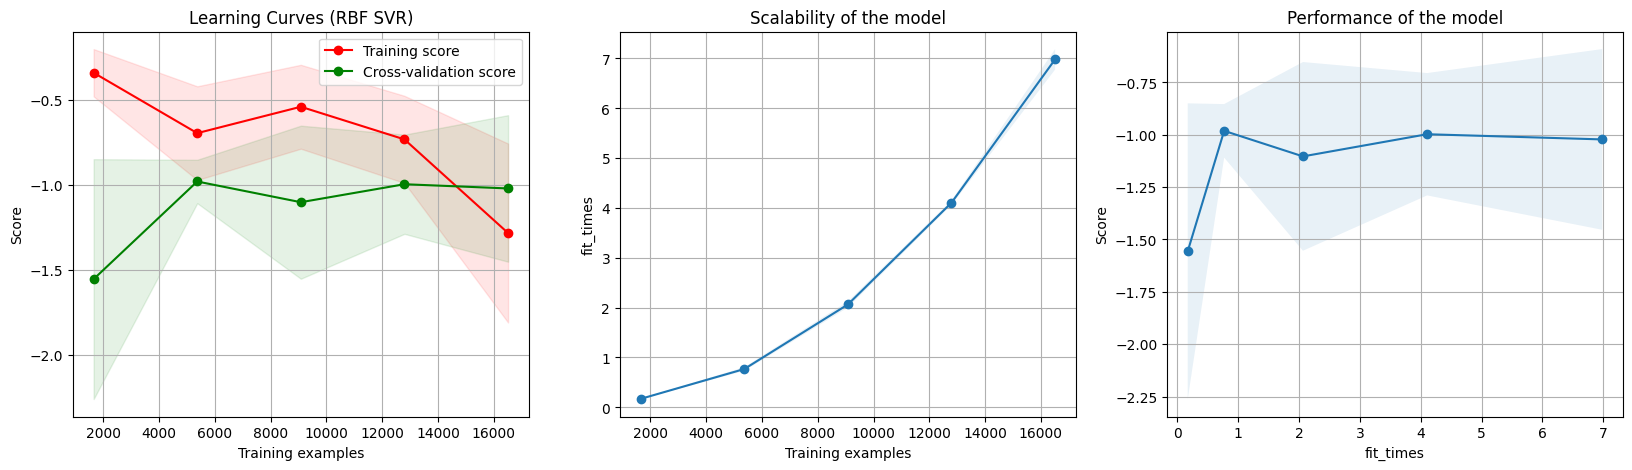

In [21]:
from dataviz import plothistory, plot_learning_curve

plot_learning_curve(svr,
                    "Learning Curves (RBF SVR)",
                    X, y,
                    scoring="neg_mean_squared_error")

<module 'matplotlib.pyplot' from 'C:\\Users\\night\\Desktop\\Projects\\AI\\ML_Jungle\\env\\lib\\site-packages\\matplotlib\\pyplot.py'>

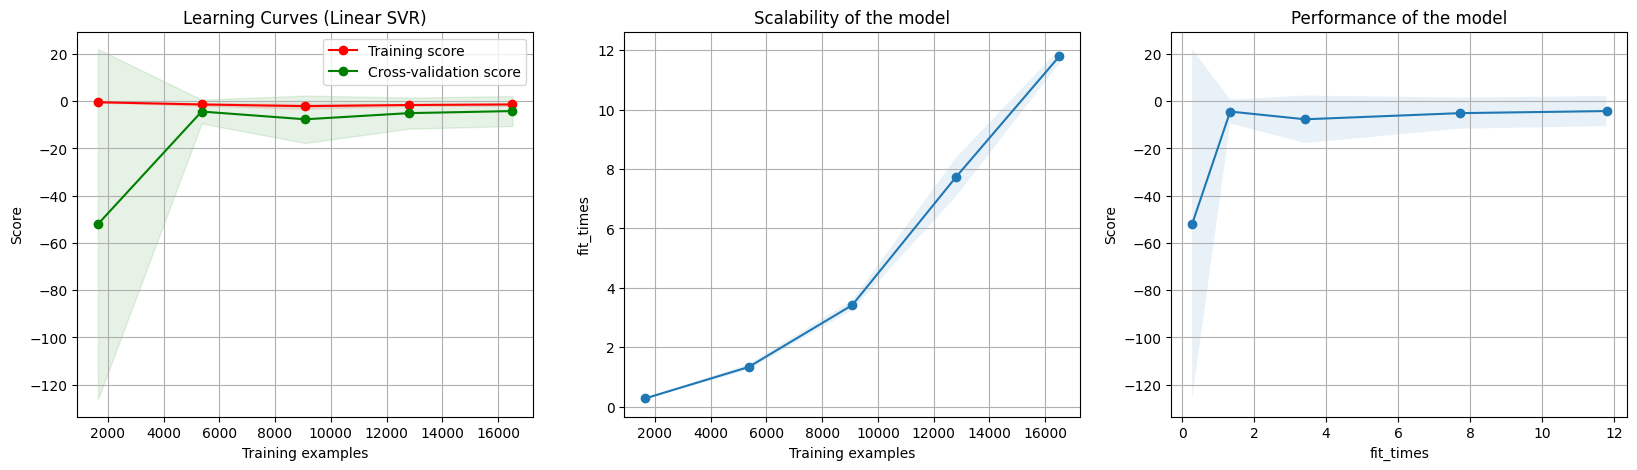

In [22]:
plot_learning_curve(linear_svr,
                    "Learning Curves (Linear SVR)",
                    X, y,
                    scoring="neg_mean_squared_error")

In [23]:
# XGBoost
import xgboost
from xgboost import XGBRegressor

xgb = model(XGBRegressor(n_estimators=128, learning_rate=0.1))
xgb.fit(X_train, y_train)

print(f"XGBoost MSE (train): {mean_squared_error(y_train, xgb.predict(X_train))}")
print(f"XGBoost MSE (val): {mean_squared_error(y_val, xgb.predict(X_val))}")

XGBoost MSE (train): 0.645901605644839
XGBoost MSE (val): 0.6452607839033544


C:\Users\night\AppData\Local\Temp\ipykernel_57040\3534408730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X["Location"] = df_X["Latitude"] * df_X["Longitude"]


<module 'matplotlib.pyplot' from 'C:\\Users\\night\\Desktop\\Projects\\AI\\ML_Jungle\\env\\lib\\site-packages\\matplotlib\\pyplot.py'>

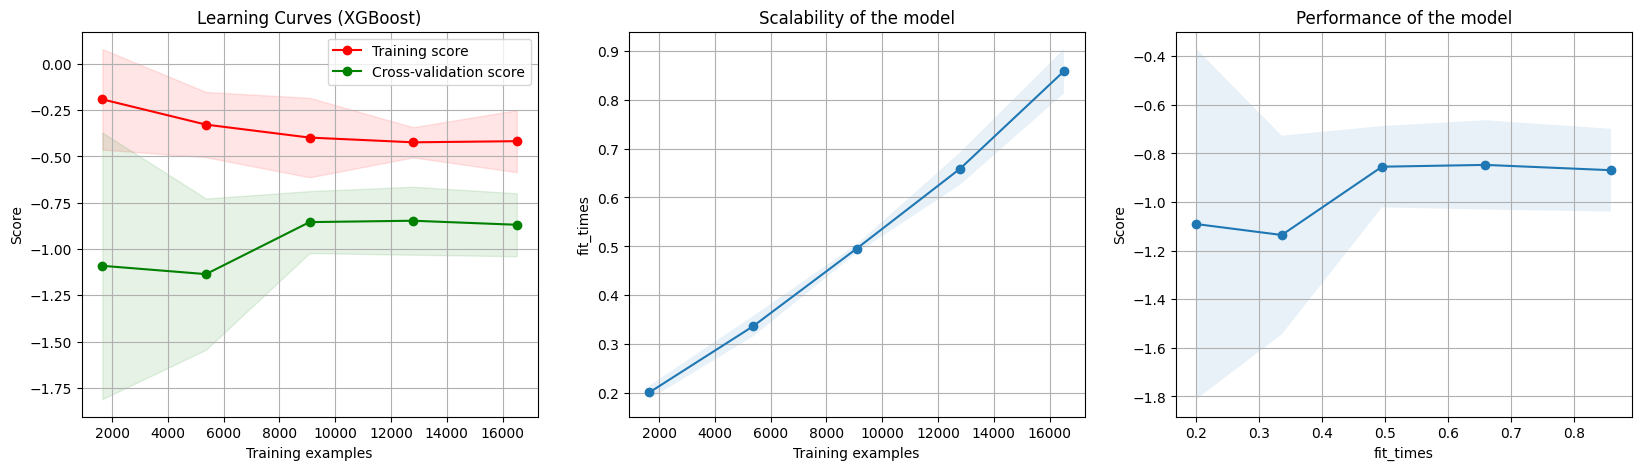

In [24]:
plot_learning_curve(xgb,
                    "Learning Curves (XGBoost)",
                    X, y,
                    scoring="neg_mean_squared_error")

In [25]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

C:\Users\night\AppData\Local\Temp\ipykernel_57040\3534408730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X["Location"] = df_X["Latitude"] * df_X["Longitude"]


Epoch 1/100
129/129 [==============================] - 0s 930us/step - loss: 0.7746
Epoch 2/100
129/129 [==============================] - 0s 947us/step - loss: 0.4621
Epoch 3/100
129/129 [==============================] - 0s 938us/step - loss: 0.4200
Epoch 4/100
129/129 [==============================] - 0s 961us/step - loss: 0.4035
Epoch 5/100
129/129 [==============================] - 0s 1ms/step - loss: 0.3890
Epoch 6/100
129/129 [==============================] - 0s 1ms/step - loss: 0.3798
Epoch 7/100
129/129 [==============================] - 0s 953us/step - loss: 0.3715
Epoch 8/100
129/129 [==============================] - 0s 938us/step - loss: 0.3596
Epoch 9/100
129/129 [==============================] - 0s 938us/step - loss: 0.3523
Epoch 10/100
129/129 [==============================] - 0s 922us/step - loss: 0.3510
Epoch 11/100
129/129 [==============================] - 0s 914us/step - loss: 0.3568
Epoch 12/100
129/129 [==============================] - 0s 1ms/step - loss: 0.

129/129 [==============================] - 0s 963us/step - loss: 0.2707
Epoch 99/100
129/129 [==============================] - 0s 1ms/step - loss: 0.2737
Epoch 100/100
129/129 [==============================] - 0s 1ms/step - loss: 0.2746


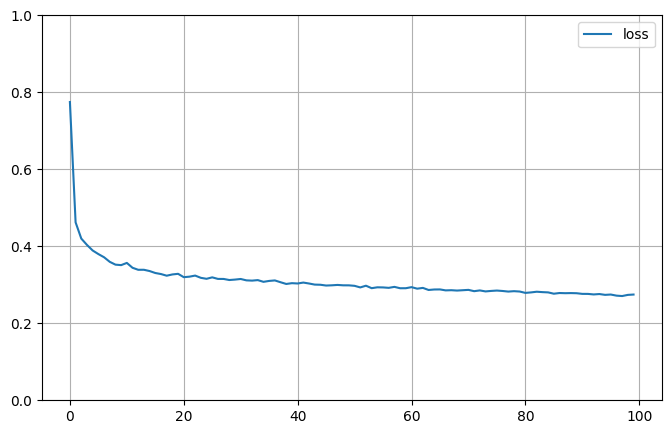

In [44]:
# Neural Network
import scikeras
from scikeras.wrappers import KerasRegressor
from keras_to_sklearn import ModelWrapper
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, PReLU, BatchNormalization
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
#from src.learning_rate_schedulers import OneCycleScheduler

input_size = preprocessor.fit_transform(X_train).shape[1] # X is (m, input_size)

def nn_selu_model():
    nn = Sequential([
        Input(shape=(input_size,)),
        
        # no batchnorm; preprocessing will already take care of standardization
        
        Dense(85, kernel_initializer="lecun_normal", bias_initializer="zeros"),
        Activation("selu"),
        
        Dense(80, kernel_initializer="lecun_normal", bias_initializer="zeros"),
        Activation("selu"),
        
        Dense(80, kernel_initializer="lecun_normal", bias_initializer="zeros"),
        Activation("selu"),
        
        Dense(1, activation="linear", kernel_initializer="lecun_normal", bias_initializer="zeros")
    ])
    
    nn.compile(loss=MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
    
    return ModelWrapper(KerasRegressor(model=nn, batch_size=128, epochs=100, callbacks=[]))

nn_selu = nn_selu_model()
selu_nn_model = model(nn_selu.model)

selu_nn_model.fit(X_train, y_train)
plothistory(nn_selu.model.history_)

In [45]:
print(f"SeLU MSE (train): {mean_squared_error(y_train, selu_nn_model.predict(X_train))}")
print(f"SeLU MSE (val): {mean_squared_error(y_val, selu_nn_model.predict(X_val))}")

129/129 [==============================] - 0s 695us/step
SeLU MSE (train): 1.5949133713689219
17/17 [==============================] - 0s 875us/step
SeLU MSE (val): 1.5353586294755794


C:\Users\night\AppData\Local\Temp\ipykernel_57040\3534408730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X["Location"] = df_X["Latitude"] * df_X["Longitude"]


Epoch 1/100
129/129 [==============================] - 1s 1ms/step - loss: 1.4284
Epoch 2/100
129/129 [==============================] - 0s 1ms/step - loss: 0.5052
Epoch 3/100
129/129 [==============================] - 0s 1ms/step - loss: 0.4499
Epoch 4/100
129/129 [==============================] - 0s 1ms/step - loss: 0.4289
Epoch 5/100
129/129 [==============================] - 0s 1ms/step - loss: 0.4128
Epoch 6/100
129/129 [==============================] - 0s 1ms/step - loss: 0.4019
Epoch 7/100
129/129 [==============================] - 0s 1ms/step - loss: 0.3826
Epoch 8/100
129/129 [==============================] - 0s 1ms/step - loss: 0.3891
Epoch 9/100
129/129 [==============================] - 0s 1ms/step - loss: 0.3780
Epoch 10/100
129/129 [==============================] - 0s 1ms/step - loss: 0.3765
Epoch 11/100
129/129 [==============================] - 0s 1ms/step - loss: 0.3718
Epoch 12/100
129/129 [==============================] - 0s 1ms/step - loss: 0.3648
Epoch 13/100


129/129 [==============================] - 0s 1ms/step - loss: 0.3031
Epoch 100/100
129/129 [==============================] - 0s 1ms/step - loss: 0.3045


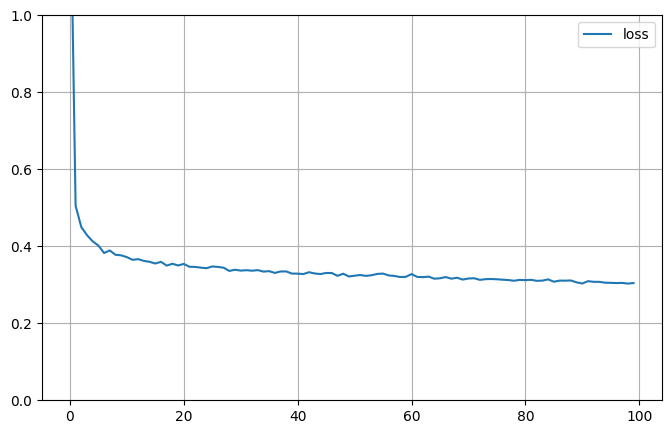

In [43]:
def nn_experimental_model():
    input_layer = Input(shape=(input_size,))
    
    hl1 = Dense(35, kernel_initializer="he_uniform", use_bias=False)(input_layer)
    hl1_batchnorm = BatchNormalization()(hl1)
    hl1_act = PReLU()(hl1_batchnorm)
    
    hl2 = Dense(30, kernel_initializer="glorot_uniform", use_bias=False)(hl1_act)
    hl2_batchnorm = BatchNormalization()(hl2)
    hl2_act = Activation("swish")(hl2_batchnorm)
    
    hl3 = Dense(30, kernel_initializer="glorot_uniform", use_bias=False)(hl2_act)
    hl3_batchnorm = BatchNormalization()(hl3)
    hl3_act = Activation("swish")(hl3_batchnorm)
    
    output_layer = Dense(1, activation="linear", kernel_initializer="glorot_uniform")(layers.concatenate([
        hl1_act, hl2_act, hl3_act
    ]))
    
    nn = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    nn.compile(loss=MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
    
    return ModelWrapper(KerasRegressor(model=nn, batch_size=128, epochs=100, callbacks=[]))

nn_experimental = nn_experimental_model()
experimental_nn_model = model(nn_experimental.model)

experimental_nn_model.fit(X_train, y_train)
plothistory(nn_experimental.model.history_)

In [46]:
print(f"Experimental MSE (train): {mean_squared_error(y_train, experimental_nn_model.predict(X_train))}")
print(f"Experimental MSE (val): {mean_squared_error(y_val, experimental_nn_model.predict(X_val))}")

129/129 [==============================] - 0s 617us/step
Experimental MSE (train): 1.175045181292379
 1/17 [>.............................] - ETA: 1s

C:\Users\night\AppData\Local\Temp\ipykernel_57040\3534408730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X["Location"] = df_X["Latitude"] * df_X["Longitude"]


17/17 [==============================] - 0s 750us/step
Experimental MSE (val): 1.0944598263951837


In [47]:
print(f"XGBoost MSE (train): {mean_squared_error(y_train, xgb.predict(X_train))}")
print(f"XGBoost MSE (val): {mean_squared_error(y_val, xgb.predict(X_val))}")

XGBoost MSE (train): 0.5313113150923435
XGBoost MSE (val): 0.6153450552770497


C:\Users\night\AppData\Local\Temp\ipykernel_57040\3534408730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X["Location"] = df_X["Latitude"] * df_X["Longitude"]


In [48]:
print(f"SeLU MSE (test): {mean_squared_error(y_test, selu_nn_model.predict(X_test))}")
print(f"XGBoost MSE (test): {mean_squared_error(y_test, xgb.predict(X_test))}")

17/17 [==============================] - 0s 817us/step
SeLU MSE (test): 1.4956658616383425
XGBoost MSE (test): 0.7831188572301604


C:\Users\night\AppData\Local\Temp\ipykernel_57040\3534408730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X["Location"] = df_X["Latitude"] * df_X["Longitude"]
C:\Users\night\AppData\Local\Temp\ipykernel_57040\3534408730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X["Location"] = df_X["Latitude"] * df_X["Longitude"]
